# Ride Duration in NYC taxi data

This is a notebook is to predict ride duration from NYC taxi data for MLOps bootcamp week 1.
Data can be found here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

## Importing Packages

In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt


## Seeting up training and evalutation

In [2]:
df_train = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet')
df_val = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet')


df_train['duration'] = df_train.lpep_dropoff_datetime - df_train.lpep_pickup_datetime
df_train.duration = df_train.duration.apply(lambda td: td.total_seconds() / 60)

df_val['duration'] = df_val.lpep_dropoff_datetime - df_val.lpep_pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

df_train = df_train[(df_train.duration >= 1) & (df_train.duration <= 60)]
df_val = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]


categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df_train[categorical] = df_train[categorical].astype(str)
df_val[categorical] = df_val[categorical].astype(str)

In [3]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

7.1228220948023795

In [5]:
y_pred_val = lr.predict(X_val)
root_mean_squared_error(y_val, y_pred_val)

7.265831283470444

## Visualization of the predictions vs actual 

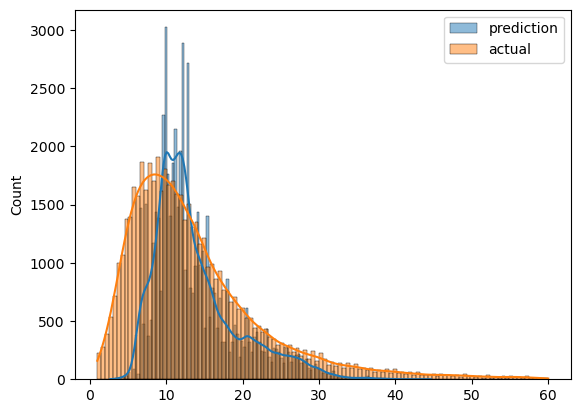

In [6]:
sns.histplot(y_pred, label='prediction', kde=True)
sns.histplot(y_train, label='actual', kde=True)

plt.legend()
plt.show()

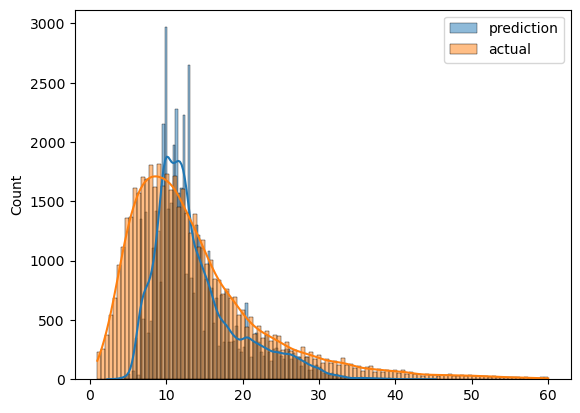

In [7]:
sns.histplot(y_pred_val, label='prediction', kde=True)
sns.histplot(y_val, label='actual', kde=True)

plt.legend()
plt.show()

## Exporting using pickle

In [9]:
with open('model_lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)